In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import prepare
import evaluate
from scipy import stats
import itertools

In [61]:
zillow = prepare.prep_zillow()

Prepped csv exist, pulling data...


In [62]:
# how many nulls are there?
zillow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52319 non-null  float64
 1   bathroomcnt                   52319 non-null  float64
 2   calculatedfinishedsquarefeet  52319 non-null  float64
 3   taxvaluedollarcnt             52319 non-null  float64
 4   age                           52319 non-null  float64
 5   fips_la_county                52319 non-null  int64  
 6   fips_orange_county            52319 non-null  int64  
 7   fips_ventura_county           52319 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 3.2 MB


In [63]:
# split the data set into train, validate, and test
train, validate, test = prepare.split_data(zillow, 'taxvaluedollarcnt', stratify=False)

In [64]:
train.shape, validate.shape, test.shape

((29298, 8), (12557, 8), (10464, 8))

**EXPLORE**

Here I chose to use the profile Report module to explore the data.
First without removing any outliers.
Then I removed the outliers and then I used the profile report to explore the data again.
The distributions were much easier to read and understand.

In [65]:
train.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,age,fips_la_county,fips_orange_county,fips_ventura_county
count,29298.000000,29298.000000,29298.000000,2.929800e+04,29298.000000,29298.000000,29298.000000,29298.000000
mean,3.301420,2.298297,1917.796573,5.259507e+05,53.678647,0.648201,0.268482,0.083316
std,0.940841,1.019158,1001.558447,7.705365e+05,23.039665,0.477540,0.443178,0.276364
min,0.000000,0.000000,128.000000,1.000000e+03,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1264.250000,1.935835e+05,38.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1655.000000,3.704135e+05,57.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2301.000000,6.134678e+05,67.000000,1.000000,1.000000,0.000000
max,14.000000,18.000000,20612.000000,4.906124e+07,137.000000,1.000000,1.000000,1.000000


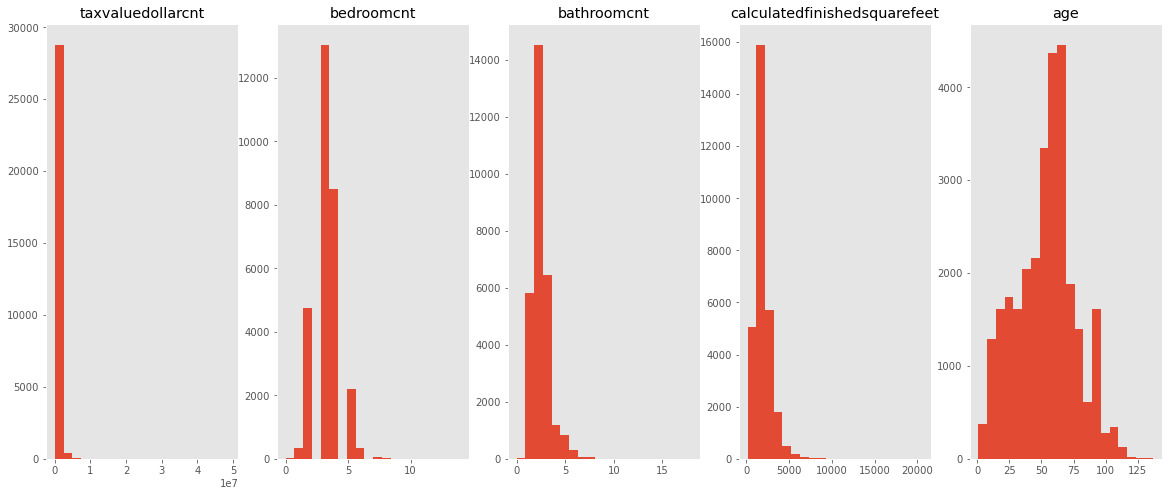

In [66]:
# lets look at the distribution of the target variable plus a few other variables
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# pick the columns to plot
cols = ['taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'age']
# run throught the columns and plot the distribution
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,5,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train[col].hist(bins=20)


In [67]:
# call function from prepare to remove outliers
train_wo_outliers = prepare.remove_outliers(train, 4)
train_wo_outliers.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,age,fips_la_county,fips_orange_county,fips_ventura_county
count,28920.000000,28920.000000,28920.000000,2.892000e+04,28920.000000,28920.000000,28920.000000,28920.000000
mean,3.278769,2.251815,1862.010166,4.748995e+05,53.923651,0.647960,0.268396,0.083645
std,0.910128,0.920298,840.353554,4.417431e+05,22.877279,0.477615,0.443132,0.276859
min,0.000000,0.000000,128.000000,1.000000e+03,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1260.000000,1.911185e+05,39.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1642.000000,3.660560e+05,57.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2266.000000,6.002015e+05,67.000000,1.000000,1.000000,0.000000
max,7.000000,6.000000,5916.000000,3.600000e+06,137.000000,1.000000,1.000000,1.000000


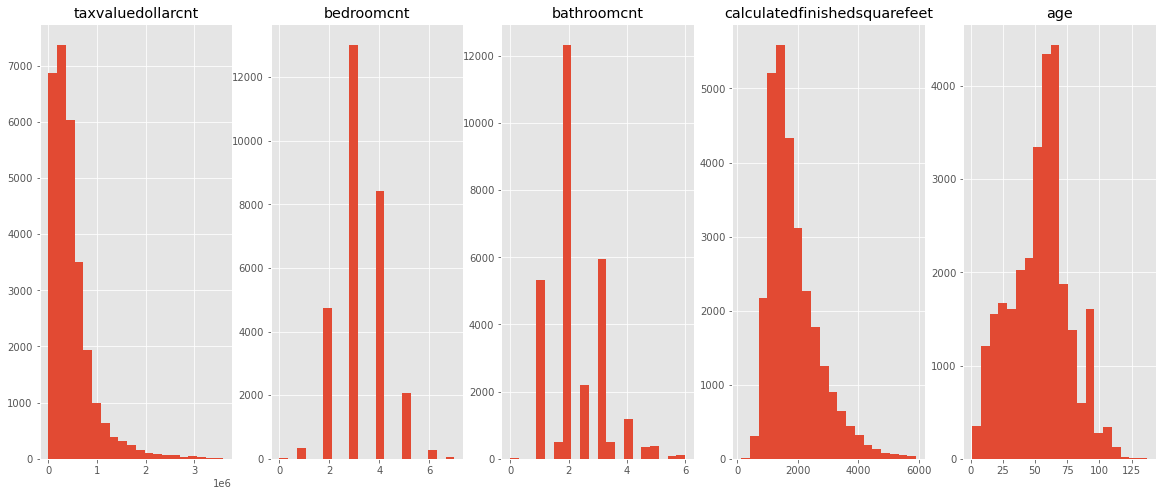

In [68]:
# lets look at the distribution of the target variable plus a few other variables with some outliers removed
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# pick the columns to plot
cols = ['taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'age']
# run throught the columns and plot the distribution
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,len(cols),plot_number)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train_wo_outliers[col].hist(bins=20)

removing outliers makes the data easier to interpret and the distribution more normal

In [69]:
# lets remove the outliers from the train, validate and test df
# outliers are removed to make the data more normal and easier to work with
# extreme values are removed but this constitutes a small amount of data.
n_rows = len(train)
train = prepare.remove_outliers(train, 4)
change = (n_rows - len(train))/n_rows
validate = prepare.remove_outliers(validate, 4)
test = prepare.remove_outliers(test, 4)
change

0.012901904566864632

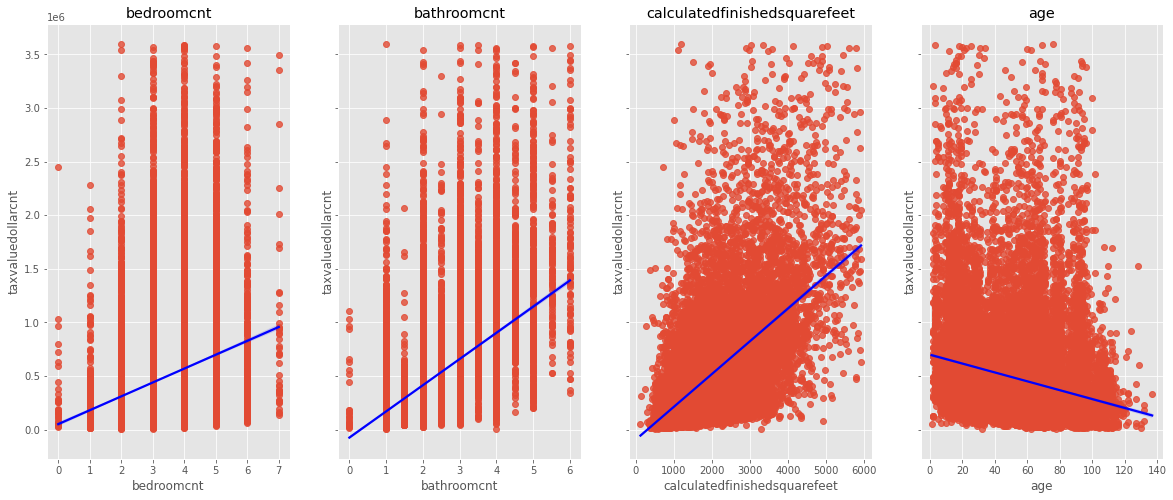

In [70]:
# lets look at the relationship between the target variable and the other variables
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# pick the columns to plot
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'age']
# plt.subplot(row X col, where?)
fig, axes = plt.subplots(1,4, sharey=True)
# run throught the columns and plot the distribution
for i, col in enumerate(cols):

    # Title with column name.
    axes[i].set_title(col)
    # Display lmplot for column.
    sns.regplot(data=train, x=col, y='taxvaluedollarcnt', line_kws={'color': 'blue'}, ax = axes[i])

In [71]:
#split train, validate, and test into x and y
X_train, y_train = prepare.split_x_y(train, 'taxvaluedollarcnt')
X_validate, y_validate = prepare.split_x_y(validate, 'taxvaluedollarcnt')
X_test, y_test = prepare.split_x_y(test, 'taxvaluedollarcnt')

In [ ]:
# choose columns to scale based on datatypes
columns_to_scale = X_train.select_dtypes(include ='float64').columns
columns_to_scale
# add 'scaled' to the column names in columns_to_scale
scaled_columns = ['scaled_' + col for col in columns_to_scale]

In [73]:
# lets scale the data
# make and fit the scaler
scaler = RobustScaler().fit(X_train[columns_to_scale])
# Use the scaler to transform train, validate, test (use the thing)
X_train_scaled = scaler.transform(X_train[columns_to_scale])
# put scaled columns into df
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = scaled_columns)
# concat the scaled df back onto original
X_train= pd.concat([X_train, X_train_scaled], axis=1)
# do the same for validate and test
X_validate_scaled = scaler.transform(X_validate[columns_to_scale])
X_validate_scaled = pd.DataFrame(X_validate_scaled, index = X_validate.index, columns = scaled_columns)
X_validate= pd.concat([X_validate, X_validate_scaled], axis=1)
X_test_scaled = scaler.transform(X_test[columns_to_scale])
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = scaled_columns)
X_test= pd.concat([X_test, X_test_scaled], axis=1)


**Question 1**
    
    Is there a correlation between calculated square feet and the value of the property?



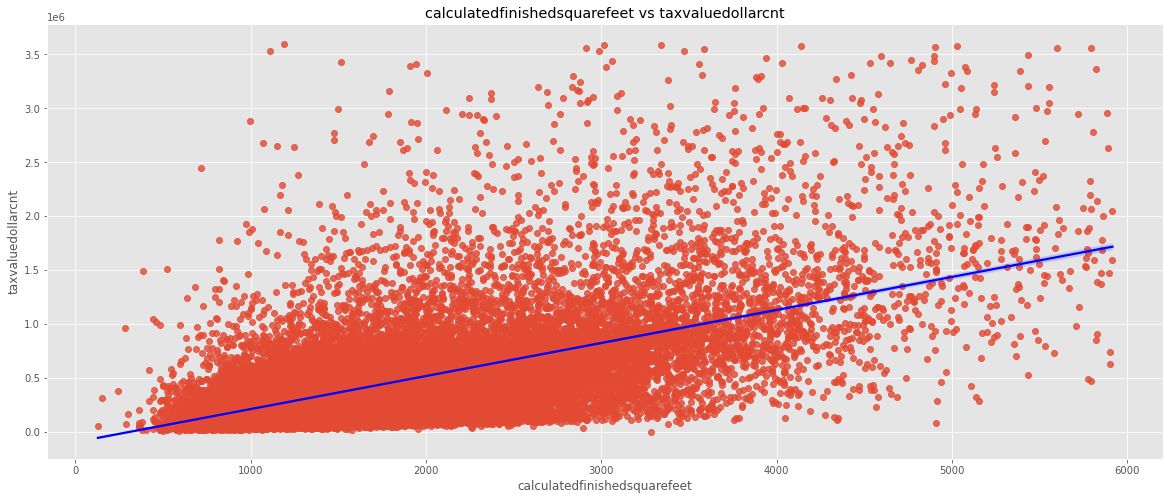

In [125]:
# make a scatter plot of the relationship between calculatedfinishedsquarefeet and taxvaluedollarcnt
sns.regplot(data=train, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', line_kws={'color': 'blue'})
# add title
plt.title('calculatedfinishedsquarefeet vs taxvaluedollarcnt')
plt.show()

    Lets test this hypothesis

$H_0$ : There is no linear relationship between square feet and the value of the property.
 
$H_A$ : There is a linear relationship between square feet and the value of the property.

In [114]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, we can use the pearson R test
corr, p = stats.pearsonr(train['calculatedfinishedsquarefeet'], train['taxvaluedollarcnt'])
corr, p
# P-value is less than 0.05, so we reject null hypothesis

(0.5828920833091596, 0.0)

    Reject the null hypothesis and conclude that there is a linear relationship between square feet and the value of the property.

~~$H_0$ : There is no linear relationship between square feet and the value of the property.~~
 
$H_A$ : There is a linear relationship between square feet and the value of the property.

** Sqft affects the value of the property **

**Question 2**
    
    Is there a correlation between bathrooms and the value of the property?



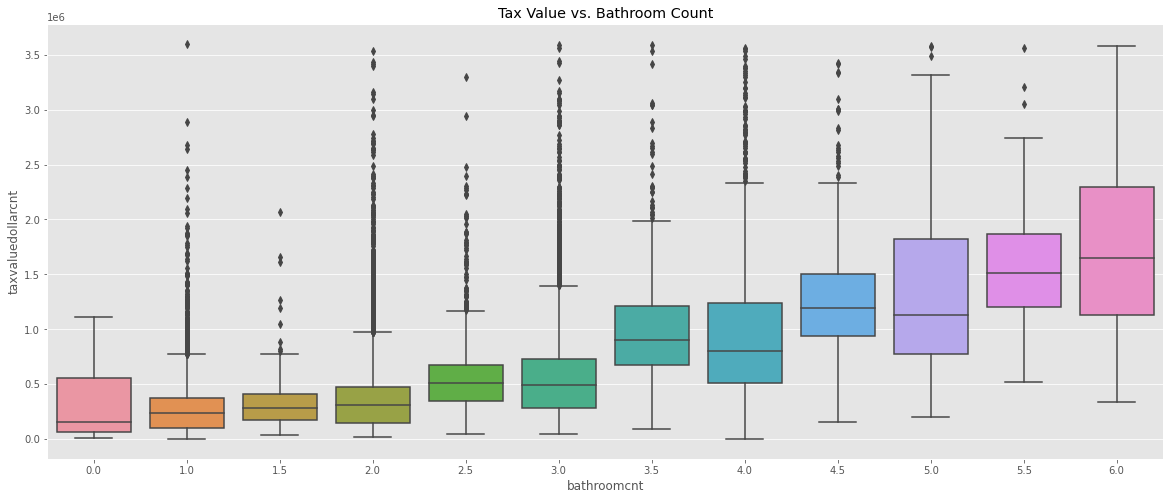

In [123]:
# lets look at the relationship between the bathroom count and the target variable
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# lets use a box plot to show the relationship between the target variable and the bathroom count
sns.boxplot(data=train, x='bathroomcnt', y='taxvaluedollarcnt')
# add title
plt.title('Tax Value vs. Bathroom Count')
plt.show()

    Lets test this hypothesis

$H_0$ : There is no linear relationship between bathroom count and the value of the property.
 
$H_A$ : There is a linear relationship between bathroom count and the value of the property.

In [117]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, we can use the pearson R test
corr, p = stats.pearsonr(train['bathroomcnt'], train['taxvaluedollarcnt'])
corr, p
# P-value is less than 0.05, so we reject null hypothesis

(0.5091860450543995, 0.0)

    Lets test this hypothesis

~~$H_0$ : There is no linear relationship between bathroom count and the value of the property.~~
 
$H_A$ : There is a linear relationship between bathroom count and the value of the property.

** Number of bathrooms affects the value of the property **

**Question 3**

    Is there a correlation between the number of bedrooms and the value of the property?

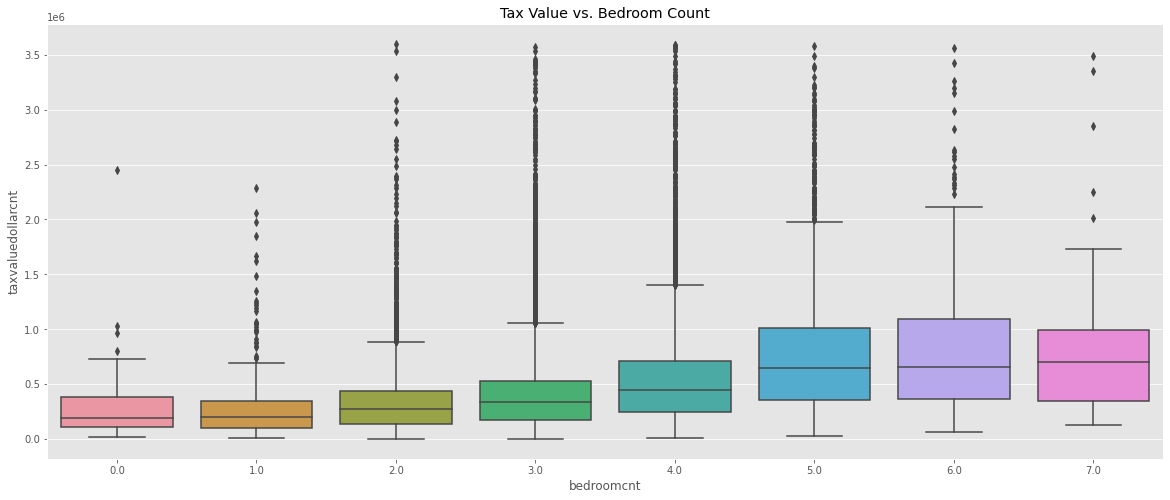

In [126]:
# lets look at the relationship between the bedroom count and the target variable
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# lets use a box plot to show the relationship between the target variable and the bedroom count
sns.boxplot(data=train, x='bedroomcnt', y='taxvaluedollarcnt')
# add title
plt.title('Tax Value vs. Bedroom Count')
plt.show()

** Bedroom count also affects the value of the property **

**Question 4**

    Is there a correlation between the buildings age and the value of the property?

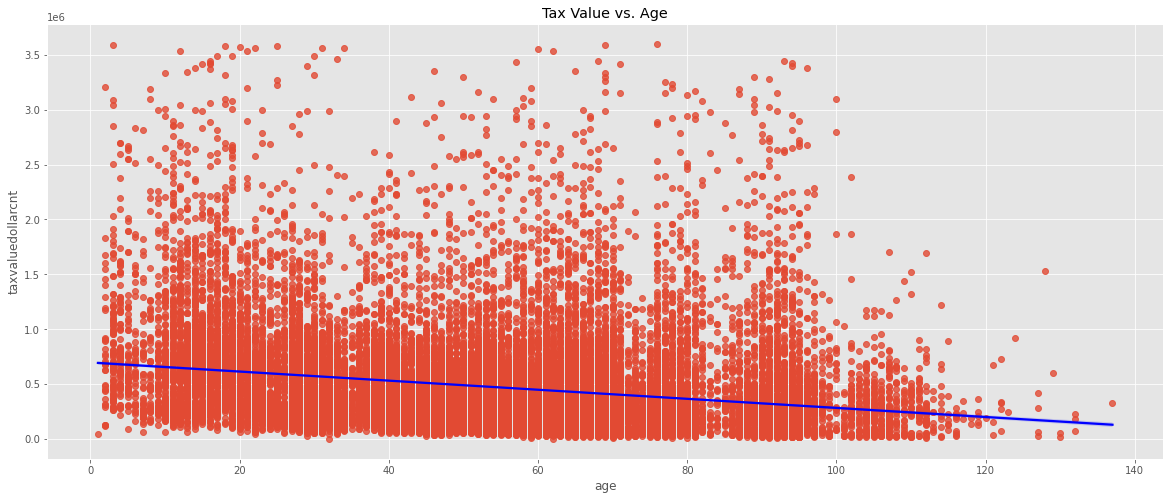

In [127]:
# lets look at the relationship between the age and the target variable
# lets change figure size
plt.rcParams['figure.figsize'] = (20, 8)
# lets use a box plot to show the relationship between the target variable and the age
sns.regplot(data=train, x='age', y='taxvaluedollarcnt', line_kws={'color': 'blue'})
# add title
plt.title('Tax Value vs. Age')
plt.show()

Newer homes are more expensive.

**Feature engineering**

    We will do this with and without the scaled columns

In [106]:
# make a model
model = LinearRegression()
# use recursive feature elimination to select features
rfe = RFE(model, n_features_to_select=3)
# fit the RFE to the training data
rfe.fit(X_train, y_train)
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.columns)


,rfe_ranking
bedroomcnt,1
bathroomcnt,2
calculatedfinishedsquarefeet,7
age,6
fips_la_county,4
fips_orange_county,3
fips_ventura_county,5
scaled_bedroomcnt,1
scaled_bathroomcnt,1
scaled_calculatedfinishedsquarefeet,9


In [107]:
# fit the RFE to the training without the oringal features that were scaled
rfe.fit(X_train.drop(columns_to_scale, axis=1), y_train)
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.drop(columns_to_scale, axis=1).columns)

,rfe_ranking
fips_la_county,1
fips_orange_county,1
fips_ventura_county,1
scaled_bedroomcnt,3
scaled_bathroomcnt,4
scaled_calculatedfinishedsquarefeet,2
scaled_age,5


In [108]:
# fit the RFE to the training with only the original and not the scaled features
rfe.fit(X_train.drop(scaled_columns, axis=1), y_train)
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.drop(scaled_columns, axis=1).columns)

,rfe_ranking
bedroomcnt,3
bathroomcnt,2
calculatedfinishedsquarefeet,5
age,4
fips_la_county,1
fips_orange_county,1
fips_ventura_county,1


This shows suggest that location may be a big indicator of the taxvaluedollarcnt. This lines of with most real estate marketing "LOCATION, LOCATION, LOCATION"

In [159]:
scaled_columns

['scaled_bedroomcnt',
 'scaled_bathroomcnt',
 'scaled_calculatedfinishedsquarefeet',
 'scaled_age',
 'scaled_scaled_bedroomcnt',
 'scaled_scaled_bathroomcnt',
 'scaled_scaled_calculatedfinishedsquarefeet',
 'scaled_scaled_age']

**Summary**

1. There is a linear relationship between square feet and the value of the property.
2. There is a linear relationship between bathrooms and the value of the property.
3. There is a linear relationship between bedrooms and the value of the property.
4. There is a linear relationship between the buildings age and the value of the property.
5. Location also appears important in predicting the value of the property as seen by the RFE.
    (RFE is a feature selection algorithm)

These features will be a great starting point for building a predictive model. Our first model will take the first three features mentioned then more combinations will be attempted from the above listed. It is important to note that several other features are also available, but due to time constraints we will not explore them yet.

***MODELING***

**Create a baseline**

In [76]:
# following code block heavily borrowed from https://ds.codeup.com/regression/model/#polynomial-regression_1
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict taxvaluedollarcnt_mean
taxvaluedollarcnt_mean = y_train['taxvaluedollarcnt'].mean()
y_train['taxvaluedollarcnt_mean'] = taxvaluedollarcnt_mean
y_validate['taxvaluedollarcnt_mean'] = taxvaluedollarcnt_mean

# 2. compute taxvaluedollarcnt_median
taxvaluedollarcnt_median = y_train['taxvaluedollarcnt'].median()
y_train['taxvaluedollarcnt_median'] = taxvaluedollarcnt_median
y_validate['taxvaluedollarcnt_median'] = taxvaluedollarcnt_median

# 3. RMSE of taxvaluedollarcnt_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of taxvaluedollarcnt_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  441735.43 
Validate/Out-of-Sample:  443686.09
RMSE using Median
Train/In-Sample:  454947.37 
Validate/Out-of-Sample:  458139.51


In [77]:
y_train.head()

,taxvaluedollarcnt,taxvaluedollarcnt_mean,taxvaluedollarcnt_median
12992,216351.0,474899.532123,366056.0
26986,98346.0,474899.532123,366056.0
30104,268861.0,474899.532123,366056.0
3553,432894.0,474899.532123,366056.0
33422,676000.0,474899.532123,366056.0


In [78]:
evaluate.baseline_mean_errors(y_train['taxvaluedollarcnt'])

SSE     0.000000e+00
MSE     1.951302e+11
RMSE    4.417354e+05
dtype: float64

In [79]:
evaluate.baseline_median_errors(y_train['taxvaluedollarcnt'])

SSE     0.000000e+00
MSE     2.069771e+11
RMSE    4.549474e+05
dtype: float64

In [80]:
evaluate.baseline_mean_errors(y_validate['taxvaluedollarcnt'])

SSE     3.657210e+15
MSE     1.968276e+11
RMSE    4.436526e+05
dtype: float64

In [81]:
evaluate.baseline_median_errors(y_validate['taxvaluedollarcnt'])

SSE     5.249396e+15
MSE     2.083911e+11
RMSE    4.564988e+05
dtype: float64

In [82]:
# set the baseline as the RMSE using mean on validate
baseline_train = evaluate.baseline_mean_errors(y_train['taxvaluedollarcnt'])['RMSE']
baseline_validate = evaluate.baseline_mean_errors(y_validate['taxvaluedollarcnt'])['RMSE']
baseline_train, baseline_validate


(441735.4335987771, 443652.55233791796)

    This shows that mean is better by 10k on train and 20k on validate

In [83]:
# build a dataframe to store rmse values
#results = pd.DataFrame(columns=['model_number','model_type','RMSE_train','RMSE_validate','baseline','better_than_baseline'])
results = pd.DataFrame()
baseline_model = pd.Series({'model_number':'baseline','model_type':'baseline','RMSE_train':baseline_train,'RMSE_validate':baseline_validate,'baseline':baseline_train,'better_than_baseline':False})
results = pd.concat([results, baseline_model],axis = 0)
results.T

,model_number,model_type,RMSE_train,RMSE_validate,baseline,better_than_baseline
0,baseline,baseline,441735.433599,443652.552338,441735.433599,False


**MODELING**

First a baseline model is created and evaulated. The two most common baseline models are mean and median. We will use the best performing model based of of RMSE. RMSE will be the metric used to evaluate the models thereafter because it is a measure of the error in units relevant to the data (ie. how far off in dollars are we on average).

Per project:

    "For the first iteration of your model, use only square feet of the home, number of bedrooms, and number of bathrooms to estimate the property's assessed value, taxvaluedollarcnt. You can expand this to other fields after you have completed an mvp (minimally viable product)."

In [84]:
#choose the features per project specifications
features = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']
# make and fit the model
model1 = LinearRegression().fit(X_train[features], y_train['taxvaluedollarcnt'])
# make predictions
y_train_pred = model1.predict(X_train[features])
y_validate_pred = model1.predict(X_validate[features])
# compute the RMSE
rmse_train = mean_squared_error(y_train['taxvaluedollarcnt'], y_train_pred)**(1/2)
rmse_validate = mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate_pred)**(1/2)
# add the rmse to the results dataframe
model_results = pd.Series({'model_number':1,
    'model_type':'Linear Regression',
    'RMSE_train':rmse_train,
    'RMSE_validate':rmse_validate,
    'baseline':baseline_train,
    'better_than_baseline':rmse_train<baseline_train})
# concat the results dataframe
results = pd.concat([results, model_results],axis = 1)
# transpose it so each row is a model
results.T.reset_index(drop=True)

,model_number,model_type,RMSE_train,RMSE_validate,baseline,better_than_baseline
0,baseline,baseline,441735.433599,443652.552338,441735.433599,False
1,1,Linear Regression,352412.022916,350743.374872,441735.433599,True


In [85]:
# lets make more linear models using various combinations of features and see which one performs better
# make a list of all the features
features = X_train.columns.tolist()
# lets track top features by making an empty array and dummy score
# each model will compare to current best and set itself as best if higher
best_features =[]
best_score = baseline_validate
model_type = 'Linear Regression'
#make a model counter
model_number = 2 # starts at 2 because first model already made
#make a list of all combinations of features
combinations = []
for i in range(1, len(features)+1):
    combinations.extend(list(itertools.combinations(features,i)))
#iterate between 1 and all top features
#iterate between 1 and all top features
for combination in combinations:
    #build
    model = LinearRegression()
    #convert list to array to pass into function
    features = np.array(combination)
    #fit on the combination determined above
    model.fit(X_train[features], y_train['taxvaluedollarcnt'])
    # make predictions
    y_train_pred = model.predict(X_train[features])
    y_validate_pred = model.predict(X_validate[features])
    # compute the RMSE
    rmse_train = mean_squared_error(y_train['taxvaluedollarcnt'], y_train_pred)**(1/2)
    rmse_validate = mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate_pred)**(1/2)
    #build df
    stats = pd.Series({"model_number": model_number,
        "model_type": model_type,
        "number_of_features": len(features),
        "RMSE_train": rmse_train,
        "RMSE_validate": rmse_validate,
        "baseline": baseline_train,
        "better_than_baseline": rmse_train<baseline_train})
    # increase model counter
    model_number += 1
    results = pd.concat([results,stats],axis =1)
    # this could be done in the df but its a large output, array of up to len(best_features) strings
    # strings could be converted to index values to be more concise
    if rmse_validate < best_score:
        #reset best
        best_score = rmse_validate
        #save best features
        best_features = features

# transpose and reset the index to make it cleaner
results.T.reset_index(drop=True)

,model_number,model_type,RMSE_train,RMSE_validate,baseline,better_than_baseline,number_of_features
0,baseline,baseline,441735.433599,443652.552338,441735.433599,False,NaN
1,1,Linear Regression,352412.022916,350743.374872,441735.433599,True,NaN
2,2,Linear Regression,425721.095108,425683.870249,441735.433599,True,1
3,3,Linear Regression,380182.462078,375466.582502,441735.433599,True,1
4,4,Linear Regression,358931.94084,357040.549586,441735.433599,True,1
...,...,...,...,...,...,...,...
2044,2044,Linear Regression,349433.14854,347359.314364,441735.433599,True,10
2045,2045,Linear Regression,349433.14854,347359.314364,441735.433599,True,10
2046,2046,Linear Regression,349433.14854,347359.314364,441735.433599,True,10
2047,2047,Linear Regression,349433.14854,347359.314364,441735.433599,True,10


In [86]:
#sort by rmse_validate, then by rmse_train
results.T.reset_index(drop=True).sort_values(by = ['RMSE_validate','RMSE_train'], ascending = True)


,model_number,model_type,RMSE_train,RMSE_validate,baseline,better_than_baseline,number_of_features
1972,1972,Linear Regression,349433.472518,347354.912092,441735.433599,True,8
1696,1696,Linear Regression,349426.213464,347356.476679,441735.433599,True,7
1695,1695,Linear Regression,349428.334407,347357.693697,441735.433599,True,7
1816,1816,Linear Regression,349432.647719,347357.731373,441735.433599,True,7
1694,1694,Linear Regression,349427.500026,347358.114668,441735.433599,True,7
...,...,...,...,...,...,...,...
198,198,Linear Regression,438718.975751,440449.403167,441735.433599,True,3
7,7,Linear Regression,438881.212723,440652.336651,441735.433599,True,1
6,6,Linear Regression,439119.875733,440849.250723,441735.433599,True,1
0,baseline,baseline,441735.433599,443652.552338,441735.433599,False,NaN


In [150]:
# lets get the model number from the top performer
# get the model number from the top performer
top_model_number = results.T.reset_index(drop=True).sort_values(by = ['RMSE_validate','RMSE_train'], ascending = True).iloc[0]['model_number']
top_model_number


1972

In [87]:
#lets take a look at the best model's features, we will use this info to evaluate the model on the test set
best_features

array(['bathroomcnt', 'fips_la_county', 'fips_orange_county',
       'fips_ventura_county', 'scaled_bedroomcnt', 'scaled_bathroomcnt',
       'scaled_calculatedfinishedsquarefeet', 'scaled_age'], dtype='<U35')

In [155]:
# rebuild the best model
model = LinearRegression()
#convert list to array to pass into function
features = best_features.tolist()
#fit on the combination determined above
model.fit(X_train[features], y_train['taxvaluedollarcnt'])
# make predictions
y_train_pred = model.predict(X_train[features])
y_validate_pred = model.predict(X_validate[features])
y_test_pred = model.predict(X_test[features])
# compute the RMSE
rmse_train = mean_squared_error(y_train['taxvaluedollarcnt'], y_train_pred)**(1/2)
rmse_validate = mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate_pred)**(1/2)
rmse_test = mean_squared_error(y_test, y_test_pred)**(1/2)
#build df
stats = pd.Series({"model_number": top_model_number,
    "model_type": model_type,
    "number_of_features": len(features),
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "RMSE_test": rmse_test,
    "baseline": baseline_train,
    "better_than_baseline": rmse_train<baseline_train})

In [156]:
# show the results for the top model
stats

model_number                         1972
model_type              Linear Regression
number_of_features                      8
RMSE_train                  349433.472518
RMSE_validate               347354.912092
RMSE_test                   345867.052513
baseline                    441735.433599
better_than_baseline                 True
dtype: object